# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [24]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [6]:
countries.Country = countries.Country.str.strip()
countries.Region = countries.Region.str.strip()

col_numeric = new_column_names[2:]
countries.replace(',', '.', regex=True, inplace=True)
countries[col_numeric] = countries[col_numeric].astype('float64')

In [8]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [9]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
discretizer.fit(countries[['Pop_density']])
discretizer_Pop_density = discretizer.transform(countries[['Pop_density']])
discretizer_Pop_density[:10,0]

array([3., 6., 1., 8., 7., 0., 6., 7., 1., 5.])

In [10]:
countries.Climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [12]:
ppl_median_std = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard", StandardScaler())
])

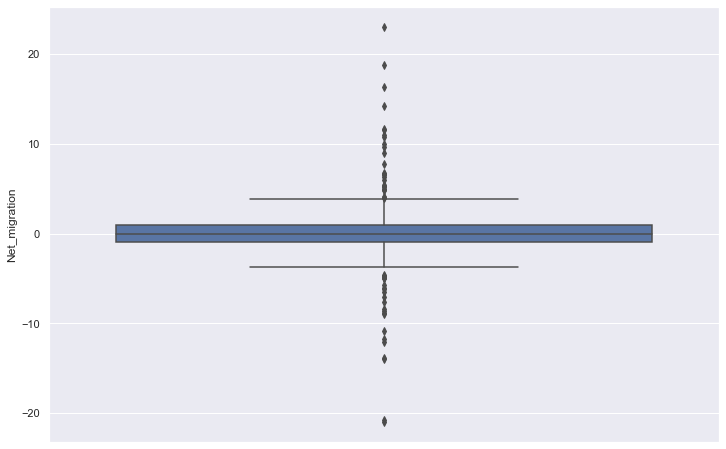

In [25]:
sns.boxplot(countries.Net_migration, orient='vertical');

In [35]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [13]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return list(countries.Region.unique())

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [14]:
def q2():
    # Retorne aqui o resultado da questão 2.
    est = KBinsDiscretizer(n_bins=10, encode='ordinal')
    est.fit(countries[['Pop_density']])
    pop_density_bins = est.transform(countries[['Pop_density']])
    total_bin_9 = sum(pop_density_bins == 9)
    return int(total_bin_9)

## Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [20]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return countries.Region.unique().size + countries.Climate.unique().size

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [21]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [30]:
def q4():
    # Retorne aqui o resultado da questão 4.
    ppl_median_std.fit(countries[col_numeric])
    col_arable = countries[col_numeric].columns == 'Arable'
    country_t_transform = ppl_median_std.transform([test_country[2:]])
    return round(float(country_t_transform[0,col_arable]),3)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [25]:
def q5():
    # Retorne aqui o resultado da questão 5.
    qtl1 = countries.Net_migration.quantile(0.25)
    qtl3 = countries.Net_migration.quantile(0.75)
    iqr  = qtl3 - qtl1

    outliers_inf = countries.Net_migration[countries.Net_migration < (qtl1 - 1.5 * iqr)]
    outliers_sup = countries.Net_migration[countries.Net_migration > (qtl3 + 1.5 * iqr)]
    return (int(outliers_inf.count()), int(outliers_sup.count()), False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [6]:
def q6():
    # Retorne aqui o resultado da questão 4.
    count_vect      = CountVectorizer()
    newsgroup_count = count_vect.fit_transform(newsgroup.data)
    idx_phone       = count_vect.vocabulary_.get('phone')
    phone_total     = newsgroup_count[:,idx_phone].toarray().sum()
    return int(phone_total)

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [29]:
def q7():
    # Retorne aqui o resultado da questão 4.
    count_tfidf     = TfidfVectorizer()
    newsgroup_tfidf = count_tfidf.fit_transform(newsgroup.data)
    idx_phone       = count_tfidf.vocabulary_.get('phone')
    phone_tfidf     = newsgroup_tfidf[:,idx_phone].toarray().sum()
    return float(phone_tfidf.round(3))